**Importing Necessary Libraries and Loading the Dataset**

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [52]:
#Loading dataset 
df = pd.read_excel('transactions.xlsx', sheet_name='Sheet1')
df.head()




,Transaction_ID,Date,Customer_Name,Total_Items,Amount($),Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000667075,2022-09-12 17:40:23,David King,5,30.98,Debit Card,Chicago,Warehouse Club,True,Teenager,Fall,BOGO (Buy One Get One)
1,1000156022,2022-01-20 23:03:20,Michael Williamson,3,23.29,Credit Card,Boston,Warehouse Club,True,Homemaker,Winter,Discount on Selected Items
2,1000681674,2022-10-15 07:49:59,Chelsea Garza,7,25.62,Debit Card,Chicago,Pharmacy,False,Teenager,Fall,Discount on Selected Items
3,1000692089,2024-04-05 09:39:58,Scott Lopez,5,14.64,Mobile Payment,Atlanta,Pharmacy,False,Homemaker,Summer,Discount on Selected Items
4,1000328702,2021-05-28 04:16:54,Crystal Adams,4,62.27,Credit Card,Miami,Convenience Store,False,Retiree,Summer,NaN


In [53]:
#cheaking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38500 entries, 0 to 38499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_ID     38500 non-null  int64  
 1   Date               38500 non-null  object 
 2   Customer_Name      38500 non-null  object 
 3   Total_Items        38500 non-null  int64  
 4   Amount($)          38500 non-null  float64
 5   Payment_Method     38500 non-null  object 
 6   City               38500 non-null  object 
 7   Store_Type         38500 non-null  object 
 8   Discount_Applied   38500 non-null  bool   
 9   Customer_Category  38500 non-null  object 
 10  Season             38500 non-null  object 
 11  Promotion          25529 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 3.3+ MB


**Data Cleaning**

In [54]:
# Check for missing values
df.isnull().sum()



Transaction_ID           0
Date                     0
Customer_Name            0
Total_Items              0
Amount($)                0
Payment_Method           0
City                     0
Store_Type               0
Discount_Applied         0
Customer_Category        0
Season                   0
Promotion            12971
dtype: int64

In [55]:
df['Date'] = pd.to_datetime(df['Date'])

**Question 1: What is the average transaction amount ($) across different store types, and how does it vary by season?**

In [56]:
avg_amount_by_store_season = df.groupby(['Store_Type', 'Season'])['Amount($)'].mean().reset_index()

In [57]:
print(avg_amount_by_store_season)

           Store_Type  Season  Amount($)
0   Convenience Store    Fall  52.872504
1   Convenience Store  Spring  53.537230
2   Convenience Store  Summer  53.345305
3   Convenience Store  Winter  51.595034
4    Department Store    Fall  51.384757
5    Department Store  Spring  52.573781
6    Department Store  Summer  52.782716
7    Department Store  Winter  52.575652
8            Pharmacy    Fall  52.363508
9            Pharmacy  Spring  52.458672
10           Pharmacy  Summer  52.049365
11           Pharmacy  Winter  53.218725
12    Specialty Store    Fall  51.823011
13    Specialty Store  Spring  53.524048
14    Specialty Store  Summer  53.594788
15    Specialty Store  Winter  51.782338
16        Supermarket    Fall  52.285728
17        Supermarket  Spring  52.691298
18        Supermarket  Summer  51.443950
19        Supermarket  Winter  52.640624
20     Warehouse Club    Fall  52.027853
21     Warehouse Club  Spring  51.597471
22     Warehouse Club  Summer  53.009120
23     Warehouse

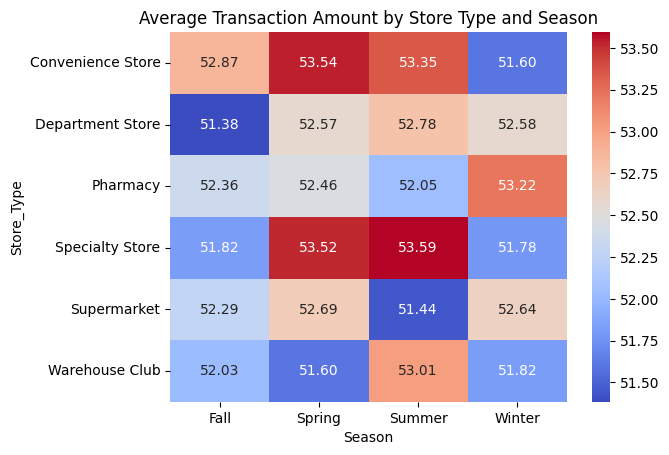

In [58]:
pivot = avg_amount_by_store_season.pivot(index='Store_Type', columns='Season', values='Amount($)')

sns.heatmap(pivot, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Average Transaction Amount by Store Type and Season')
plt.show()

**Question 2: Which payment method is most commonly used in high-value transactions (above the average transaction amount), and how does it differ across cities?**

In [59]:
avg_transaction_amount = df['Amount($)'].mean()
high_value_transactions = df[df['Amount($)'] > avg_transaction_amount]


In [60]:
payment_method_city = high_value_transactions.groupby(['Payment_Method', 'City']).size().reset_index(name='Count')
payment_method_city_sorted = payment_method_city.sort_values(by='Count', ascending=False)
print(payment_method_city_sorted)

    Payment_Method           City  Count
23      Debit Card         Dallas    538
25      Debit Card    Los Angeles    518
2             Cash        Chicago    516
29      Debit Card        Seattle    512
37  Mobile Payment       New York    510
12     Credit Card        Chicago    507
30  Mobile Payment        Atlanta    506
18     Credit Card  San Francisco    504
4             Cash        Houston    492
35  Mobile Payment    Los Angeles    492
24      Debit Card        Houston    492
38  Mobile Payment  San Francisco    490
8             Cash  San Francisco    489
16     Credit Card          Miami    489
36  Mobile Payment          Miami    485
1             Cash         Boston    485
26      Debit Card          Miami    485
5             Cash    Los Angeles    485
21      Debit Card         Boston    484
22      Debit Card        Chicago    484
14     Credit Card        Houston    484
28      Debit Card  San Francisco    483
7             Cash       New York    482
17     Credit Ca

Visual Representation of the following:

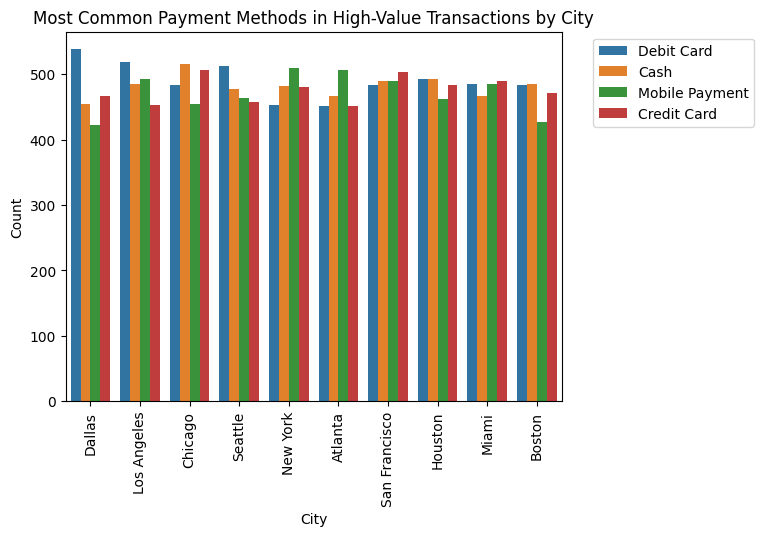

In [61]:

sns.barplot(x='City', y='Count', hue='Payment_Method', data=payment_method_city_sorted)
plt.title('Most Common Payment Methods in High-Value Transactions by City')

plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  

plt.show()

**Question 3: How do the sales amounts in transactions with discounts compare to those without discounts, and what trends can be observed over the month?**

In [62]:
df['Month'] = pd.to_datetime(df['Date']).dt.month
discount_sales = df.groupby(['Discount_Applied', 'Month'])['Amount($)'].mean().reset_index()
print(discount_sales)

    Discount_Applied  Month  Amount($)
0              False      1  52.485467
1              False      2  52.398233
2              False      3  53.096045
3              False      4  52.106241
4              False      5  52.037723
5              False      6  51.340898
6              False      7  52.721215
7              False      8  51.423973
8              False      9  52.330831
9              False     10  52.912278
10             False     11  51.867874
11             False     12  52.767627
12              True      1  51.635875
13              True      2  51.750763
14              True      3  52.781049
15              True      4  53.314194
16              True      5  51.973793
17              True      6  53.007552
18              True      7  51.800124
19              True      8  52.910459
20              True      9  52.808991
21              True     10  53.052728
22              True     11  53.656895
23              True     12  52.921307


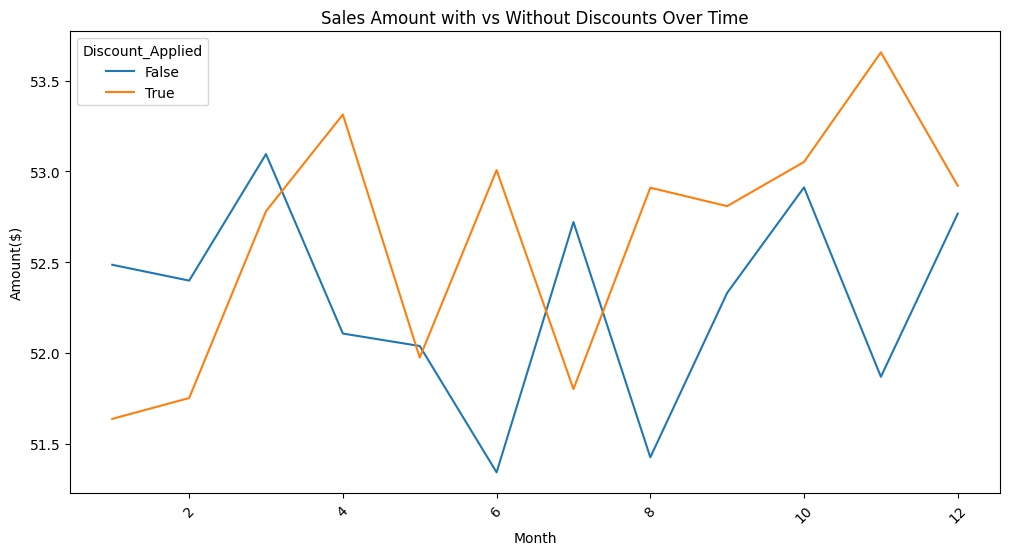

In [63]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Amount($)', hue='Discount_Applied', data=discount_sales)
plt.title('Sales Amount with vs Without Discounts Over Time')
plt.xticks(rotation=45)
plt.show()

**Question 4: What are the top three cities with the highest average number of items per transaction, and how do their sales amounts vary across seasons?**

In [64]:
avg_items_city = df.groupby('City')['Total_Items'].mean().reset_index()

In [65]:
top_cities = avg_items_city.sort_values(by='Total_Items', ascending=False).head(3)

In [66]:
top_cities_data = df[df['City'].isin(top_cities['City'])]

In [67]:
sales_by_city_season = top_cities_data.groupby(['City', 'Season'])['Amount($)'].mean().reset_index()
print(sales_by_city_season)

       City  Season  Amount($)
0   Chicago    Fall  52.331881
1   Chicago  Spring  53.990646
2   Chicago  Summer  53.453493
3   Chicago  Winter  53.090349
4   Houston    Fall  52.965102
5   Houston  Spring  52.215140
6   Houston  Summer  52.245323
7   Houston  Winter  51.126946
8     Miami    Fall  53.052973
9     Miami  Spring  52.636293
10    Miami  Summer  51.667892
11    Miami  Winter  52.305387


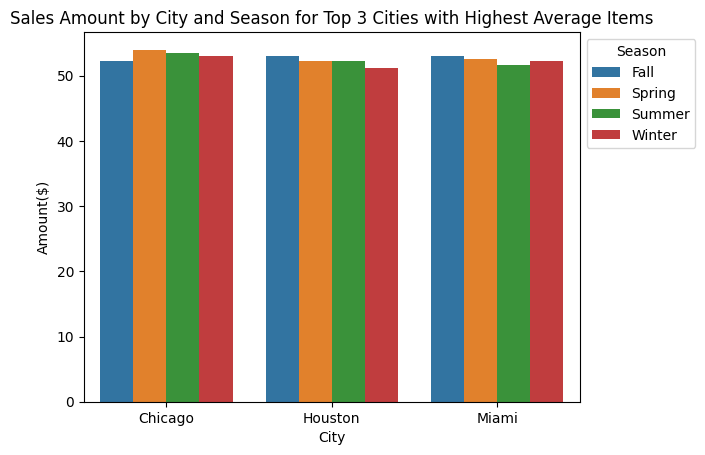

In [68]:
sns.barplot(x='City', y='Amount($)', hue='Season', data=sales_by_city_season)
plt.title('Sales Amount by City and Season for Top 3 Cities with Highest Average Items')
plt.legend(title='Season', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

**Question 5: How effective are different promotions in driving higher transaction amounts, and which promotion type performs best in each season?**

In [69]:
promotion_effectiveness = df.groupby(['Promotion', 'Season'])['Amount($)'].mean().reset_index()
print(promotion_effectiveness)

                    Promotion  Season  Amount($)
0      BOGO (Buy One Get One)    Fall  52.678438
1      BOGO (Buy One Get One)  Spring  52.519019
2      BOGO (Buy One Get One)  Summer  53.271761
3      BOGO (Buy One Get One)  Winter  52.872204
4  Discount on Selected Items    Fall  51.997053
5  Discount on Selected Items  Spring  53.177148
6  Discount on Selected Items  Summer  51.842832
7  Discount on Selected Items  Winter  52.012388


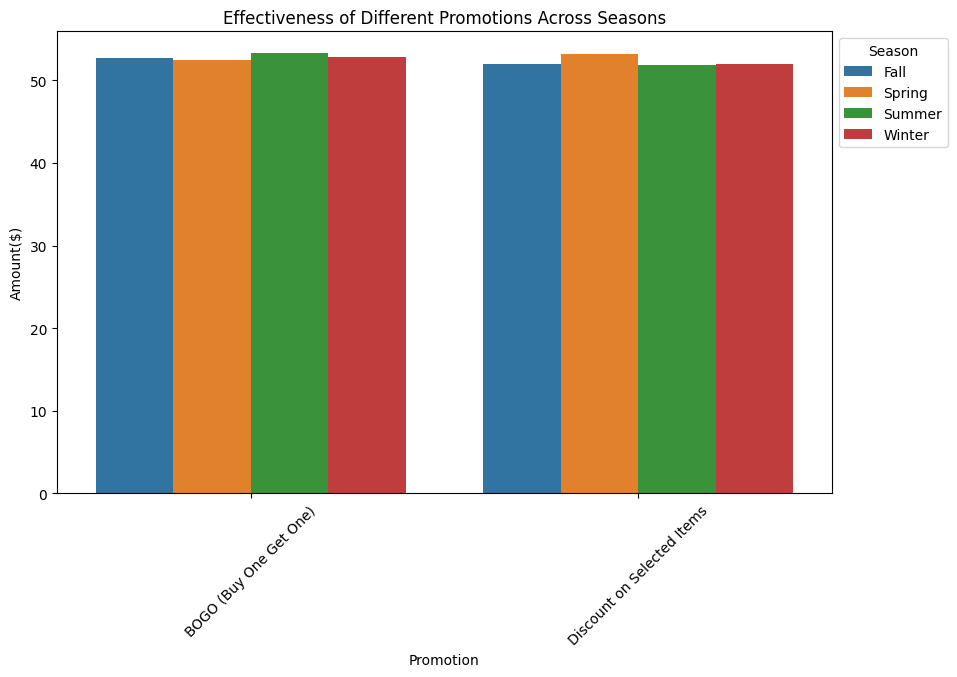

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Promotion', y='Amount($)', hue='Season', data=promotion_effectiveness)
plt.title('Effectiveness of Different Promotions Across Seasons')
plt.xticks(rotation=45)
plt.legend(title='Season', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()